### Homework 4

In [1]:
import numpy as np

#### Q1

In [3]:
def gram_schmidt(X):
    '''
    Compute orthonormal basis matrix with Gram Schmidt Orthogonalization
    Input: X (matrix) n * p matrix (usually assume n > p)
    Return: U (matrix) n * r matrix where r = Rank(X)
    '''

    _, p = X.shape

    # Pre-process: delete all-0 columns
    idx = []
    for i in range(p):
        if not np.all(X[:, i] == 0):
            idx.append(i)
    X = X[:, idx]

    # Pre-process: get u1 of U
    x1 = X[:, 0]
    u1 = x1 / np.linalg.norm(x1)
    U = np.array([u1]).T

    # Build orthonormal basis during iteration
    n, p = X.shape

    for j in range(1, p):

        x_j = X[:, j]
        resi = x_j - U @ U.T @ x_j

        # check zero vectors
        if np.all(resi < 1e-10):
            u_j = np.zeros(n)
        else:
            u_j = resi / np.linalg.norm(resi)

        U = np.append(U, np.array([u_j]).T, axis=1)
    
    return U


In [4]:
X = np.array([[1,1,3,2], [2,3,0,1], [2,2,6,4]]).T
print("The original matrix is: \n", X)
print("The orthonormal basis is:")
print(gram_schmidt(X))

The original matrix is: 
 [[1 2 2]
 [1 3 2]
 [3 0 6]
 [2 1 4]]
The orthonormal basis is:
[[ 0.25819889  0.46802523  0.        ]
 [ 0.25819889  0.77325908  0.        ]
 [ 0.77459667 -0.42732739  0.        ]
 [ 0.51639778  0.02034892  0.        ]]


In [5]:
X = np.array([[2,3,0,1,2,2],[2,2,5,6,4,1],[0,0,0,0,0,0],[2,1,3,2,4,7],[1,5,2,3,8,7]]).T
print("The original matrix:")
print(X)
print("The orthonormal basis is:")
print(gram_schmidt(X))

The original matrix:
[[2 2 0 2 1]
 [3 2 0 1 5]
 [0 5 0 3 2]
 [1 6 0 2 3]
 [2 4 0 4 8]
 [2 1 0 7 7]]
The orthonormal basis is:
[[ 0.42640143 -0.0489116  -0.12110815 -0.74473382]
 [ 0.63960215 -0.20787429 -0.47088003  0.15268698]
 [ 0.          0.67253448  0.21885973 -0.16923961]
 [ 0.21320072  0.64807868 -0.19233128 -0.06270889]
 [ 0.42640143  0.22010219  0.10669052  0.6198291 ]
 [ 0.42640143 -0.1834185   0.81690332 -0.0727713 ]]


### Q6

##### a)

In [6]:
import numpy as np
import scipy.io
data = scipy.io.loadmat("fisheriris.mat")

X = data['meas'][:, :3]
y = data['species']

y = [sp[0][0] for sp in y]
replace = {"setosa": -1, "versicolor": 0, "virginica": 1}
y = np.array([replace[sp] for sp in y])


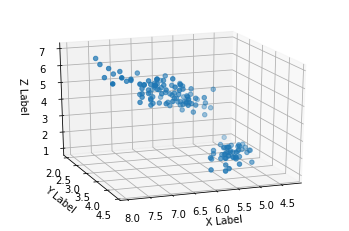

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# rotating (change the following parameters for different angles)
elevation = 20
azimuth = 70
# rotates 3d scatter plot
ax.view_init(elev=elevation, azim=azimuth)


The subspace is approximately the plane spanned by vectors: (8,2,7) and (5,2,4).

##### b)

set classification rule: </p>
suppose w_hat * xi = z </p>
y_hat = -1, if z <= 0, </p>
y_hat = 0, if 0 < z < 0.5 </p>
y_hat = 1, if z >= 0.5

In [35]:
sub = np.array([[8,2,7], [5,2,4]]).T

# use projected matrix P to get all projected points on the plane
P = sub @ np.linalg.inv(sub.T @ sub) @ sub.T
proj_X = X @ P

# get estimated weights w_hat and use the 
# weight vector to compute predictions y_hat
w_hat = np.linalg.inv(proj_X.T @ proj_X) @ proj_X.T @ y
Z = proj_X @ w_hat

pred = []
for zi in Z:
    if zi <= 0:
        yi = -1
    elif zi < 0.5:
        yi = 0
    else:
        yi = 1
    pred.append(yi)

pred = np.array(pred)
err = np.mean(pred != y)
        
print("According to our 2-D classification rule, the estimated error rate is around", err.round(2))

According to our 2-D classification rule, the estimated error rate is around 0.11


### Q7

##### a)

In [92]:
# load the training data X and the training labels y
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import sys

matlab_data_file = sio.loadmat('face_emotion_data.mat') 
X = matlab_data_file['X']
y = matlab_data_file['y']

n, p = np.shape(X)

# error rate for regularized least squares
error_RLS = np.zeros((8, 7))
# error rate for truncated SVD
error_SVD = np.zeros((8, 7))

# SVD parameters to test
k_vals = np.arange(9) + 1 
param_err_SVD = np.zeros(len(k_vals))

# RLS parameters to test
lambda_vals = np.array([0, 0.5, 1, 2, 4, 8, 16]) 
param_err_RLS = np.zeros(len(lambda_vals))


In [91]:
def truncated_svd(X, k, y):
    '''
    compute truncated SVD
    '''
    n, p = X.shape
    u, s, vh = np.linalg.svd(X)

    sigma = np.zeros([p, n])
    for i in range(k):
        sigma[i][i] = 1/s[i]
    P = vh @ sigma @ u.T
    w_hat = P @ y

    return w_hat


In [104]:
for k in k_vals:
    print("w_hat", k)
    print(truncated_svd(X, k, y))


w_hat 1
[[ 0.07732978]
 [-0.01893478]
 [-0.00499769]
 [ 0.1655936 ]
 [-0.11415595]
 [ 0.02707604]
 [-0.00878839]
 [ 0.03452947]
 [ 0.00341001]]
w_hat 2
[[-0.02342314]
 [ 0.0969021 ]
 [-0.02510871]
 [ 0.21762174]
 [-0.14181947]
 [ 0.04129061]
 [-0.00613785]
 [-0.05115094]
 [ 0.21087963]]
w_hat 3
[[-7.52315318e-02]
 [ 1.59425490e-01]
 [-2.28004084e-02]
 [ 2.29404343e-01]
 [-1.35723330e-01]
 [ 3.99317476e-02]
 [ 1.73166310e-04]
 [ 6.71122591e-02]
 [ 1.97745661e-01]]
w_hat 4
[[ 0.21788035]
 [-0.14626517]
 [-0.00456956]
 [ 0.04725192]
 [-0.03683967]
 [ 0.00303469]
 [ 0.01439954]
 [ 0.42690074]
 [ 0.72232794]]
w_hat 5
[[ 0.06323548]
 [-0.27654644]
 [ 0.29359287]
 [ 0.05610638]
 [-0.04011996]
 [ 0.22996256]
 [-0.26451432]
 [ 0.44095647]
 [ 0.74003303]]
w_hat 6
[[ 0.08827676]
 [-0.25295159]
 [ 0.24835268]
 [ 0.04725066]
 [-0.02554753]
 [ 0.26518869]
 [-0.30961019]
 [ 0.44303178]
 [ 0.73781821]]
w_hat 7
[[ 0.05729375]
 [-0.27987606]
 [ 0.21536134]
 [ 0.04107465]
 [-0.05617809]
 [ 0.21575595]
 [

##### b)

In [101]:
def predict(z):
    pred = np.zeros(z)
    for i in range(len(z)):
        if z[i] > 0:
            pred[i] = 1
        else:
            pred[i] = -1
    return pred


In [ ]:
# N: number of groups
N = 8

for i in range(int(n/N)):
    # Split X and y
    lb = i * N
    ub = (i + 1) * N
    X_hold = X[lb:ub]
    y_hold = y[lb:ub]
    X_learn = np.concatenate((X[:lb], X[ub:]))
    y_learn = np.concatenate((y[:lb], y[ub:]))

    for lamb in lambda_vals:
        for k in k_vals:
            v, sigma, uh = np.linalg.svd(X_learn)
            w_hat = (v @ sigma.T @ u.T) @ y @ np.linalg.inv(v @ sigma.T @ sigma @ v.T + lamb)
            z = X_hold @ w_hat
            pred = predict(z)
            err = (z != pred).sum() / N
        


In [ ]:
# N: number of groups
N = 8

for i in range(int(n/N)):
    # Split X and y
    lb = i * N
    ub = (i + 1) * N
    X_hold = X[lb:ub]
    y_hold = y[lb:ub]
    X_learn = np.concatenate((X[:lb], X[ub:]))
    y_learn = np.concatenate((y[:lb], y[ub:]))

    for k in k_vals:
        w_hat = truncated_svd(X, k, y)
        z = X_hold @ w_hat
        pred = predict(z)
        err = (z != pred).sum() / N
        


See handwritten solutions on another page. I don't know what to do next about the code sorry :(

##### c)